In [5]:
__file__ = 'A1.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP4_lib")
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import unumpy as up
from uncertainties import ufloat
import scipy.constants as const

In [6]:
with open('Data/cp-cal_data.txt','r') as tf:
    data = np.genfromtxt(tf).T

<ErrorbarContainer object of 3 artists>

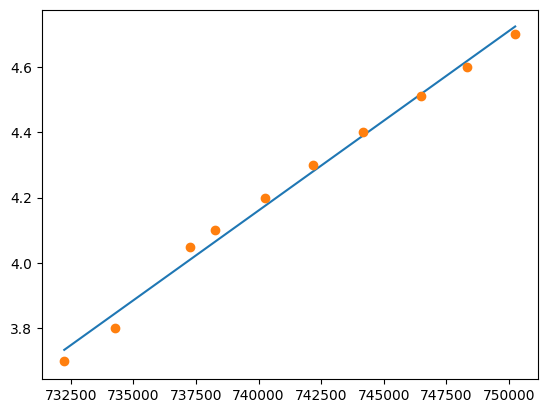

In [7]:
res = f.linfit(data[1],data[0],np.full(len(data[1]),0.005))
plt.plot(data[0],res.eval(x=data[0]))


plt.errorbar(data[0],data[1],np.full(len(data[1]),0.005),fmt='o')

In [8]:
with open('Res/cp-cal_res.txt','w')as tf:
    tf.write(str(res.params['slope'].value)+'\t'+str(res.params['slope'].stderr)+'\t'+str(res.params['intercept'].value)+'\t'+str(res.params['intercept'].stderr))